# Fase (1): Preparação e exploração rápida dos dados

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# Excluindo as variáveis "state" e "area_code" - depois, vamos já separar em treino e teste
X = df.drop(columns=['state', 'area_code', 'churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3400, 17), (3400,), (850, 17), (850,))

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3400 entries, 3835 to 692
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3400 non-null   int64  
 1   international_plan             3400 non-null   object 
 2   voice_mail_plan                3400 non-null   object 
 3   number_vmail_messages          3400 non-null   int64  
 4   total_day_minutes              3400 non-null   float64
 5   total_day_calls                3400 non-null   int64  
 6   total_day_charge               3400 non-null   float64
 7   total_eve_minutes              3400 non-null   float64
 8   total_eve_calls                3400 non-null   int64  
 9   total_eve_charge               3400 non-null   float64
 10  total_night_minutes            3400 non-null   float64
 11  total_night_calls              3400 non-null   int64  
 12  total_night_charge             3400 non-null   floa

In [7]:
y_train.value_counts()

churn
no     2922
yes     478
Name: count, dtype: int64

# Fase (2): Transformação das variáveis

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Binarizando os conjuntos pelo get_dummies
X_train = pd.get_dummies(X_train, drop_first=True, dtype='int64')
X_test = pd.get_dummies(X_test, drop_first=True, dtype='int64')

In [10]:
X_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
3835,166,0,238.6,117,40.56,242.8,73,20.64,203.3,130,9.15,10.0,8,2.70,4,0,0
1518,125,0,187.3,118,31.84,160.7,111,13.66,263.8,112,11.87,9.6,2,2.59,0,1,0
1704,89,0,105.9,151,18.00,189.6,142,16.12,170.9,67,7.69,12.7,7,3.43,0,0,0
3808,83,37,133.1,117,22.63,171.4,89,14.57,218.1,92,9.81,10.9,4,2.94,3,0,1
1448,100,0,188.5,152,32.05,148.3,115,12.61,179.8,88,8.09,15.2,5,4.10,2,0,0


In [11]:
# Normalizando os conjuntos de treino e teste
minmax = MinMaxScaler()

minmax.fit(X_train)

X_train_norm = minmax.transform(X_train)
X_test_norm = minmax.transform(X_test)

In [12]:
X_train_norm

array([[0.68181818, 0.        , 0.67880512, ..., 0.44444444, 0.        ,
        0.        ],
       [0.51239669, 0.        , 0.53285917, ..., 0.        , 1.        ,
        0.        ],
       [0.36363636, 0.        , 0.30128023, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23140496, 0.        , 0.53854908, ..., 0.33333333, 0.        ,
        0.        ],
       [0.39669421, 0.56      , 0.57553343, ..., 0.11111111, 0.        ,
        1.        ],
       [0.26033058, 0.        , 0.55248933, ..., 0.22222222, 0.        ,
        0.        ]])

# Fase (3): Treinando os modelos e mostrando os resultados

              precision    recall  f1-score   support

          no       0.95      0.96      0.96       730
         yes       0.74      0.71      0.72       120

    accuracy                           0.92       850
   macro avg       0.85      0.83      0.84       850
weighted avg       0.92      0.92      0.92       850



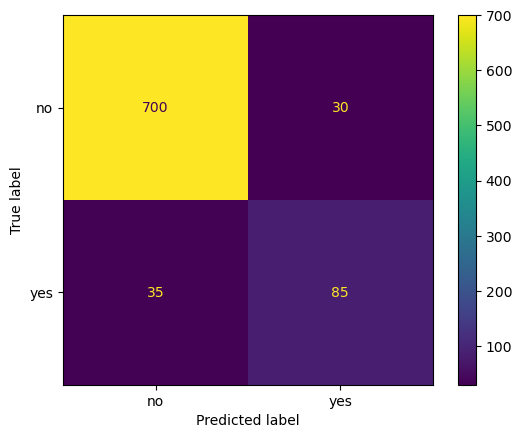

In [13]:
# Árvore de decisão
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred), display_labels=y_test.unique()).plot()
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95       730
         yes       0.89      0.42      0.58       120

    accuracy                           0.91       850
   macro avg       0.90      0.71      0.76       850
weighted avg       0.91      0.91      0.90       850



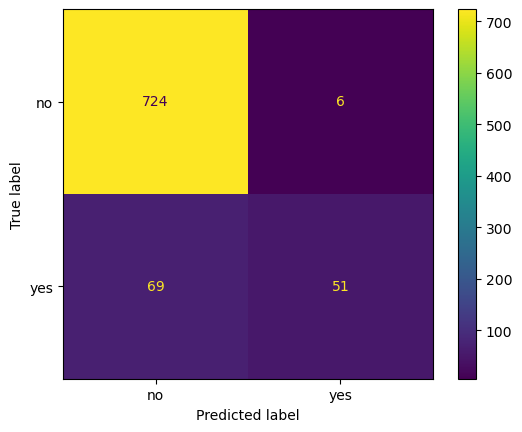

In [18]:
# Knn
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_norm, y_train)
knn_pred = knn.predict(X_test_norm)

ConfusionMatrixDisplay(confusion_matrix(y_test, knn_pred), display_labels=y_test.unique()).plot()
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          no       0.93      0.98      0.96       730
         yes       0.84      0.57      0.68       120

    accuracy                           0.92       850
   macro avg       0.89      0.77      0.82       850
weighted avg       0.92      0.92      0.92       850



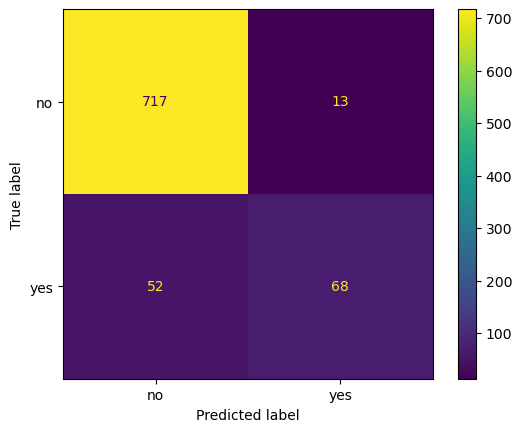

In [20]:
# MLPClassifier (Redes neurais artificiais)

mlp = MLPClassifier(max_iter=400)

mlp.fit(X_train_norm, y_train)
mlp_pred = mlp.predict(X_test_norm)

ConfusionMatrixDisplay(confusion_matrix(y_test, mlp_pred), display_labels=y_test.unique()).plot()
print(classification_report(y_test, mlp_pred))

# Fase (4): Usando o GridSearch para investigar os hiperparâmetros
* Vamos usar também o StratifiedKFold para validar os modelos

In [21]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [22]:
# Instanciando os métodos
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [23]:
# Para a árvore de decisão, vamos testar diferentes opcões de parâmetros e organizar em um dicionário
params = {'criterion': ['gini', 'entropy'],
         'max_depth': [3, 5, None],
         'min_samples_split': [2, 5, 10, 20]}

In [24]:
# Executando o GridSearch
grid = GridSearchCV(estimator=dt,
                   param_grid=params,
                   cv=skf,
                   scoring='accuracy',
                   n_jobs=-1)

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, None],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [26]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [30]:
# Exibindo os resultados
resultados = pd.DataFrame(grid.cv_results_)

# Ordenar do melhor resultado par ao pior
resultados.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.183201,0.002644,0.022443,0.001262,entropy,5,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.951471,0.936765,0.942647,0.950000,0.952941,0.946765,0.006127,1
16,0.190267,0.014504,0.021562,0.003965,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.950000,0.939706,0.942647,0.951471,0.950000,0.946765,0.004687,2
19,0.167072,0.012062,0.026407,0.004683,entropy,5,20,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.951471,0.938235,0.941176,0.951471,0.950000,0.946471,0.005627,3
17,0.190981,0.009721,0.023132,0.005607,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.947059,0.936765,0.944118,0.951471,0.950000,0.945882,0.005212,4
4,0.129375,0.007134,0.022292,0.005730,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.954412,0.939706,0.947059,0.948529,0.932353,0.944412,0.007636,5
5,0.138742,0.016398,0.018594,0.004049,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.954412,0.939706,0.944118,0.948529,0.932353,0.943824,0.007522,6
6,0.106946,0.007094,0.020290,0.003576,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.954412,0.939706,0.947059,0.945588,0.930882,0.943529,0.007870,7
23,0.252432,0.041497,0.006803,0.000376,entropy,None,20,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.952941,0.947059,0.932353,0.939706,0.938235,0.942059,0.007180,8
7,0.111059,0.004454,0.018587,0.004430,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.954412,0.939706,0.936765,0.948529,0.927941,0.941471,0.009226,9
22,0.346727,0.012629,0.010742,0.003656,entropy,None,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.945588,0.944118,0.929412,0.932353,0.944118,0.939118,0.006809,10


In [31]:
# Agora, vamos treinar o melhor modelo de Árvore de decisão com o conjunto de treinamento completo
# Na sequência, vamos verificar o desempenho da Árvore de decisão
best_dt = grid.best_estimator_

In [34]:
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [32]:
best_dt.fit(X_train, y_train)
best_pred = best_dt.predict(X_test)

              precision    recall  f1-score   support

          no       0.95      0.99      0.97       730
         yes       0.89      0.69      0.78       120

    accuracy                           0.94       850
   macro avg       0.92      0.84      0.87       850
weighted avg       0.94      0.94      0.94       850



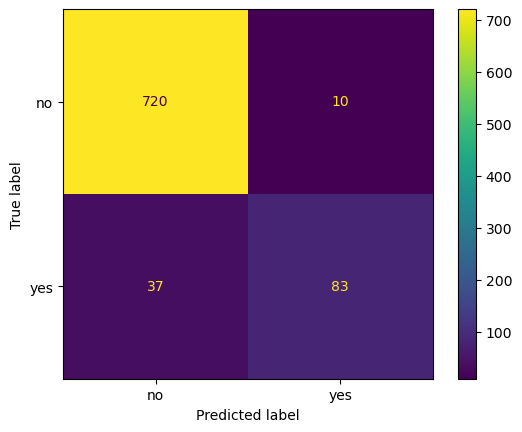

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test, best_pred), display_labels=y_test.unique()).plot()
print(classification_report(y_test, best_pred))